In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy
import os

# Cheminformatics stack
import rdkit
from rdkit import Chem
from rdkit.Chem import rdDistGeom
from rdkit.Chem import AllChem
from rdkit.Chem import FragmentMatcher
from rdkit.Chem import rdFMCS
from glob import glob

# For segfault
import faulthandler
import signal
from subprocess import Popen, PIPE
from rdkit.Chem import rdMMPA
def fragment_mols(mols_list):
    """
    This function takes a list of molecules and fragments them into smaller fragments. It returns a dataframe with the fragments and their SMILES.
    Parameters:
    mols_list: list of RDKit molecules
    """
    fragments =[]
    for mol in mols_list:
        frag3 = rdMMPA.FragmentMol(mol)
        for frag in frag3:
            if frag[0] is not None:
                fragments.append(frag[0])
            frag_smiles_ = Chem.MolToSmiles(frag[1],kekuleSmiles=True).split('.')
            for f in frag_smiles_:
                fragments.append(Chem.MolFromSmiles(f))
    df_frag = pd.DataFrame({'fragments':fragments, 'smiles': [Chem.MolToSmiles(m,kekuleSmiles=True) for m in fragments if m is not None]})
    df_frag.drop_duplicates(subset=['smiles'],inplace=True)
    print(' number of fragments:', df_frag.shape[0])
    return df_frag
def load_smiles_file(smiles_file):
    """
    This function loads a file containing SMILES and returns a dataframe with the SMILES and the RDKit molecule object.
    Parameters:
    smiles_file: string, path to the file containing the SMILES
    """
    df = pd.read_csv(smiles_file, header=None, names=['smiles'])
    df.drop_duplicates(subset=['smiles'], inplace=True)
    df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
    df.dropna(inplace=True)
    print(' number of molecules in file:', df.shape[0])
    return df


 number of molecules in file: 3298


[10:44:32] Explicit valence for atom # 2 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 15 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 8 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 5 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 4 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 4 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 6 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 1 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 0 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 3 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 2 N, 4, is greater than permitted
[10:44:32] Can't kekulize mol.  Unkekulized atoms: 3 4 8
[10:44:32] Explicit valence for atom # 3 N, 4, is greater than permitted
[10:44:32] Explicit valence for atom # 0 C, 5, is greater than per

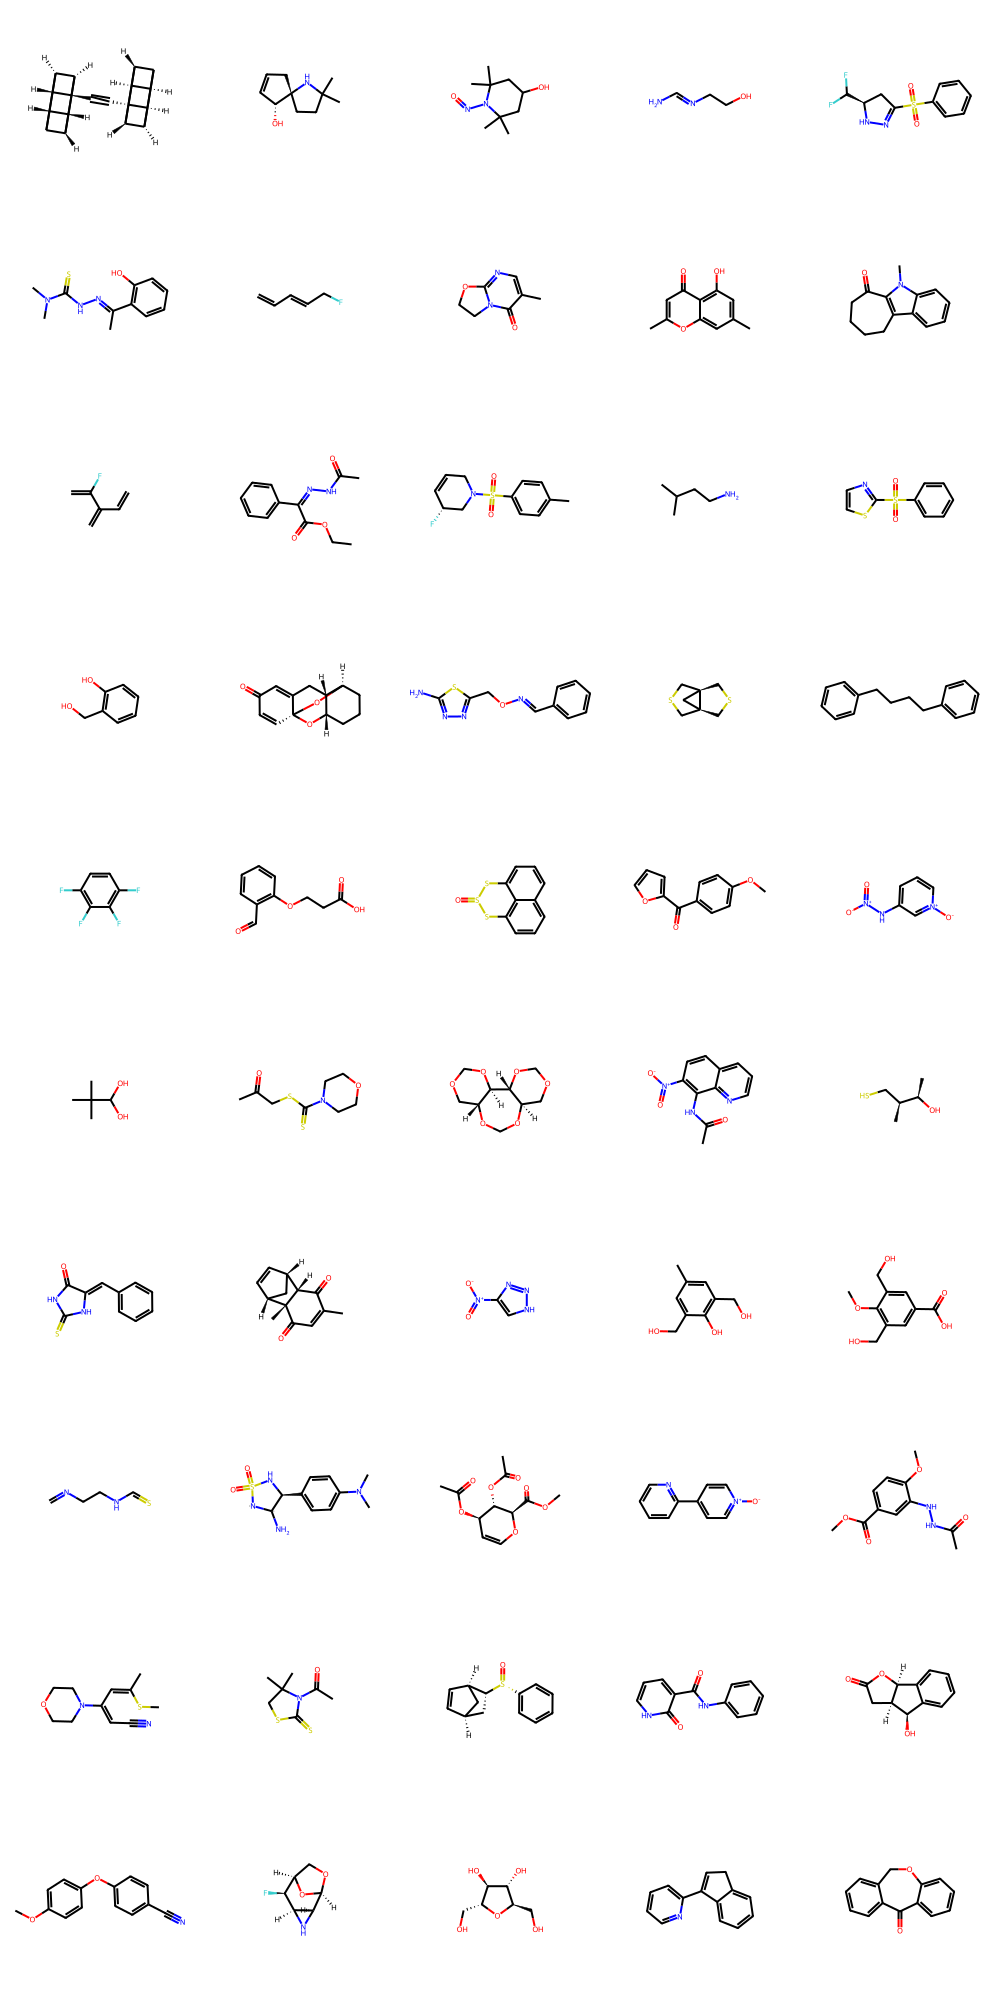

In [2]:
smiles_file = 'data/Smiles_OFF-ON_database/1_Sergi.smiles'
df_smiles = load_smiles_file(smiles_file)
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(df_smiles['mol'][:50], molsPerRow=5, subImgSize=(200,200))
img

 number of fragments: 26034
fragmented molecules


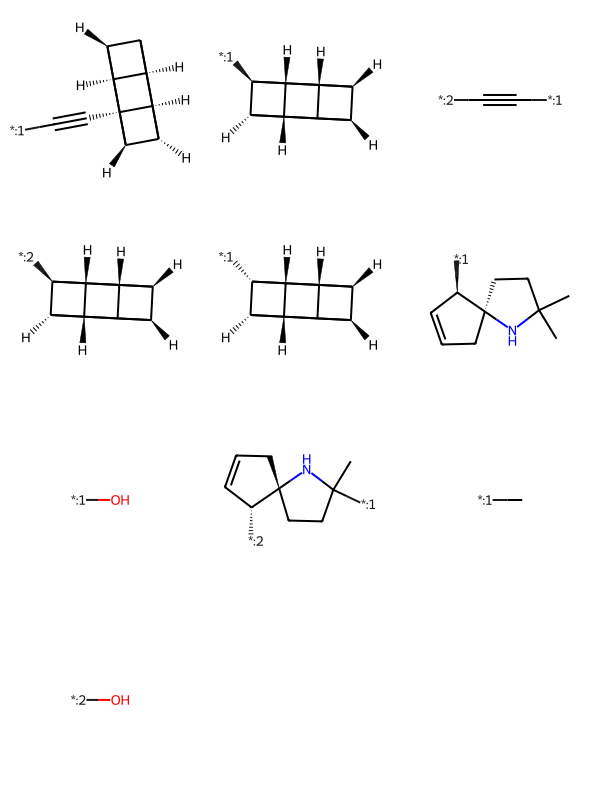

In [42]:
df_frag = fragment_mols(df_smiles['mol'])
print('fragmented molecules')
#display(Draw.MolsToGridImage(df_frag['fragments'][:10]))




In [43]:
df_frag['smiles'][:10]

0    C(#C[C@]12[C@H]3[C@@H]4C5[C@H]3[C@H]1[C@@H]5[C...
1    C12[C@H]3[C@H]4[C@@H]1[C@H]1[C@@H]2[C@@H]3[C@@...
2                                      C(#C[*:2])[*:1]
3    C12[C@H]3[C@H]4[C@@H]1[C@H]1[C@@H]2[C@@H]3[C@@...
4    C12[C@H]3[C@H]4[C@@H]1[C@H]1[C@@H]2[C@@H]3[C@]...
5                    CC1(C)CC[C@@]2(CC=C[C@H]2[*:1])N1
6                                               O[*:1]
7                CC1([*:1])CC[C@@]2(CC=C[C@H]2[*:2])N1
8                                               C[*:1]
9                                               O[*:2]
Name: smiles, dtype: object

In [45]:
import re
def get_number_connection(smile):
     return len(re.findall(':[123]',smile))
df_frag['number_of_connection'] = df_frag['smiles'].apply(get_number_connection)

df_frag.groupby('number_of_connection').count()

,fragments,smiles
number_of_connection,,
1,11386,11386
2,8566,8566
3,6082,6082


In [36]:
df_frag_csv = df_frag[['smiles','number_of_connection']]
df_frag_csv.to_csv('frag_sergi.csv', index=False)

In [4]:
# read text file
df_linker_filtered = pd.read_csv('linkers_170724_filtered.txt',delimiter='\t')
df_frag = df_frag[df_frag['smiles'].isin(df_linker_filtered['smiles'])]
#df_left_block_filtered_csv = df_left_block_filtered[['smiles','linkers_smiles']]
#df_left_block_filtered_csv.to_csv('left_blocks.csv', index=False)

In [6]:
df_linker_filtered.shape

(636, 8)

In [8]:
df_frag

,fragments,smiles
136,<rdkit.Chem.rdchem.Mol object at 0x0000018F7EC...,C(=C[*:2])[*:1]
4393,<rdkit.Chem.rdchem.Mol object at 0x0000018F7ED...,C(C=C[*:2])=C[*:1]
9269,<rdkit.Chem.rdchem.Mol object at 0x0000018F01F...,[N]([N][*:2])[*:1]
9282,<rdkit.Chem.rdchem.Mol object at 0x0000018F01F...,O=C(NN=C[*:2])[*:1]
24577,<rdkit.Chem.rdchem.Mol object at 0x0000018F041...,C(=C[*:2])c1sccc1[*:1]
25077,<rdkit.Chem.rdchem.Mol object at 0x0000018F041...,C(=C[*:2])c1ccc([*:1])cc1
29043,<rdkit.Chem.rdchem.Mol object at 0x0000018F071...,c1cc([*:1])ccc1N=N[*:2]
29054,<rdkit.Chem.rdchem.Mol object at 0x0000018F071...,N(=N[*:2])[*:1]
29932,<rdkit.Chem.rdchem.Mol object at 0x0000018F071...,C(=C[*:1])c1cccc([*:2])c1
30183,<rdkit.Chem.rdchem.Mol object at 0x0000018F071...,C(=N[*:2])[*:1]


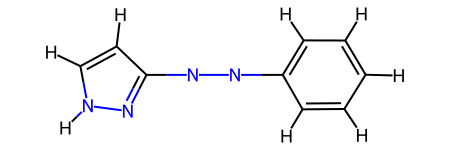

In [126]:
import stk
def build_molecule_from_frag(right_block, left_block, linker):
    """
    This function takes the 3 fragments and builds a molecule using the STK library.
    Parameters:
    right_block: RDKit molecule, right block
    left_block: RDKit molecule, left block
    linker: RDKit molecule, linker

    """
    right_block_smiles = Chem.MolToSmiles(right_block)
    right_block_smiles = right_block_smiles.replace('[*:2]', 'Br')
    bb_right = stk.BuildingBlock(
            smiles= right_block_smiles, functional_groups=[stk.BromoFactory()]
            )
    left_block_smiles = Chem.MolToSmiles(left_block)
    left_block_smiles = left_block_smiles.replace('[*:1]', 'Br')
    bb_left = stk.BuildingBlock(
            smiles= left_block_smiles, functional_groups=[stk.BromoFactory()]
            )
    linker_smiles = Chem.MolToSmiles(linker)
    linker_smiles = linker_smiles.replace('[*:1]', 'Br')
    linker_smiles = linker_smiles.replace('[*:2]', 'Br')
    bb_linker = stk.BuildingBlock(
            smiles= linker_smiles, functional_groups=[stk.BromoFactory()]
            )
    constructed_molecule = stk.ConstructedMolecule(
            stk.polymer.Linear(
                building_blocks=[bb_left, bb_linker, bb_right],
                repeating_unit="ABC",
                num_repeating_units=1,
                optimizer=stk.MCHammer()
            )
        )
    return constructed_molecule
right_block = df_right_block['right_block'].iloc[0]
left_block = df_left_block['left_block'].iloc[0]
linker = df_linkers['linker'].iloc[0]
constructed_molecule = build_molecule_from_frag(right_block, left_block, linker)
constructed_molecule.to_rdkit_mol()

[09:32:15] Explicit valence for atom # 3 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[09:32:15] Explicit valence for atom # 2 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[09:32:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[09:32:15] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[09:32:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[09:32:15] Explicit valence for atom # 2 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 4 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[09:32:15] Explicit valence for atom # 2 N, 4, is greater than perm

 number of molecules in file: 3092


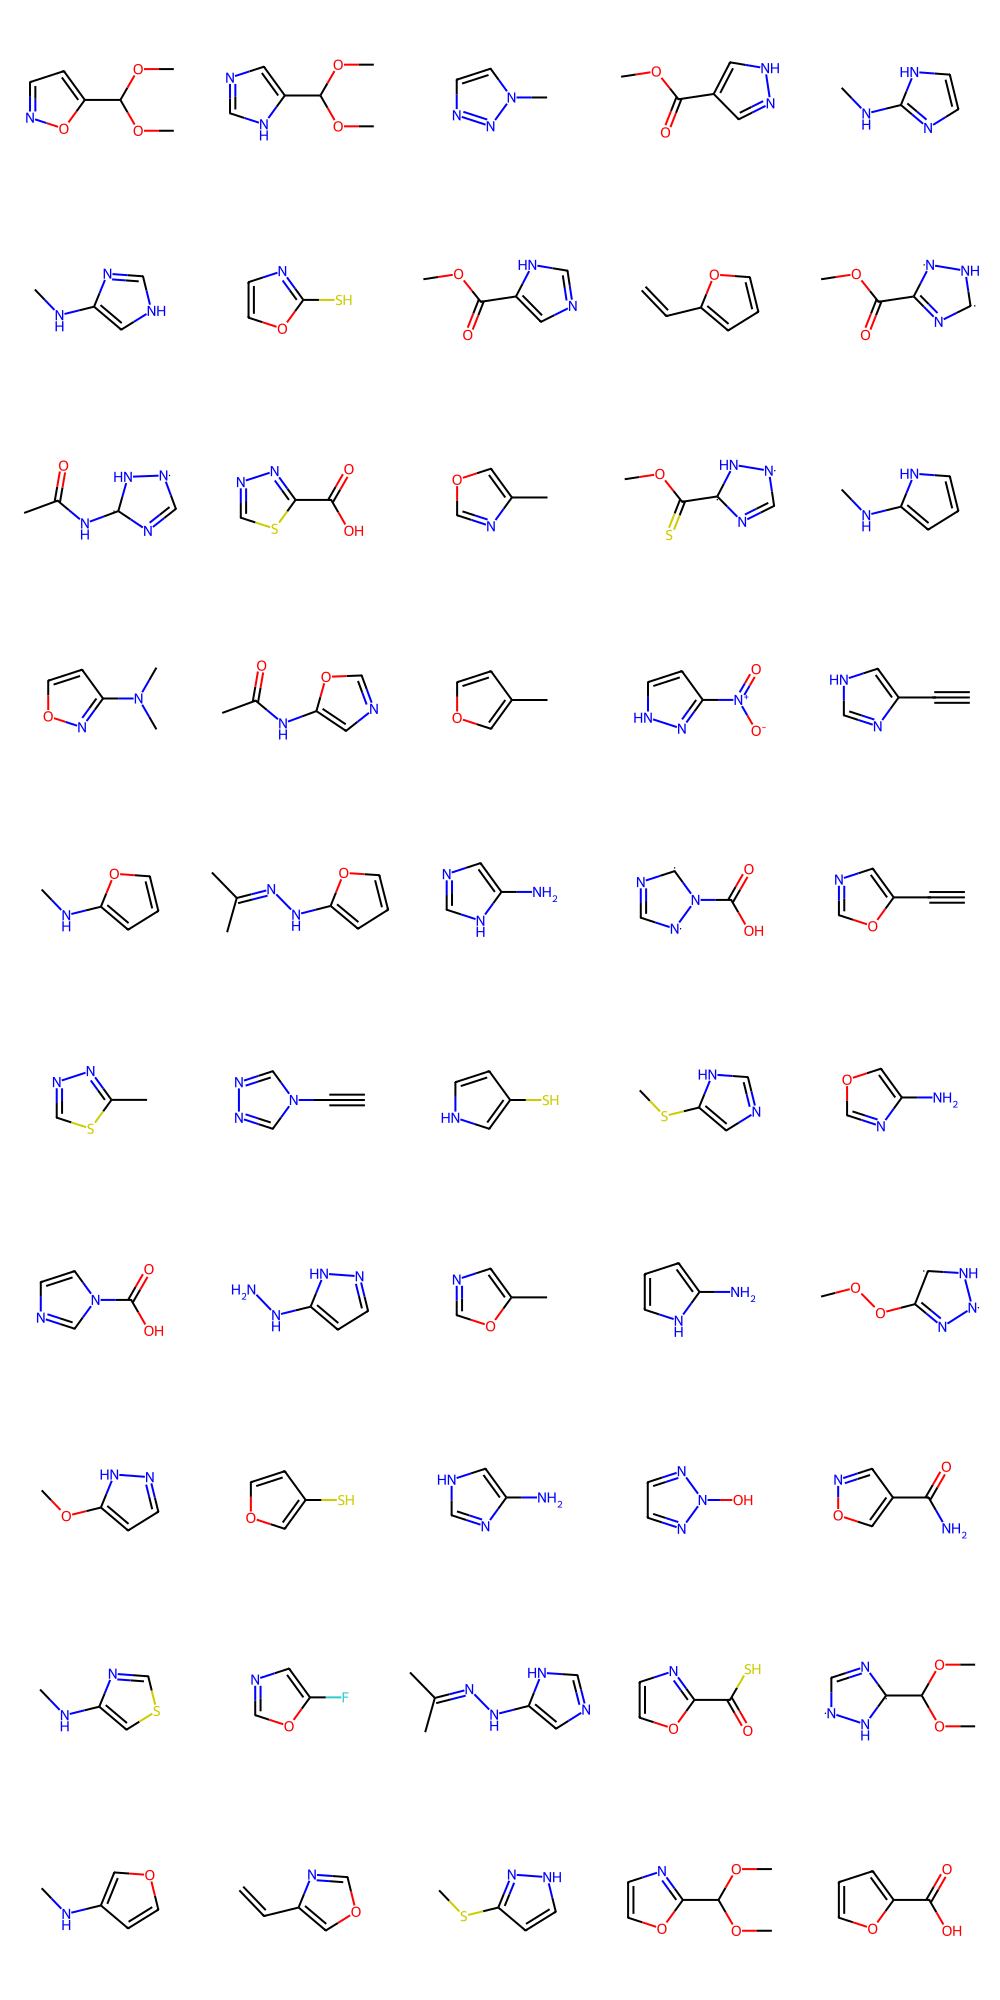

In [47]:
smiles_file = 'Smiles_OFF-ON_database/Smiles_OFF-ON_database/3_Aromatic_cyles.smiles'
df_smiles_rings = load_smiles_file(smiles_file)
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(df_smiles_rings['mol'][:50], molsPerRow=5, subImgSize=(200,200))
img

# test stuff


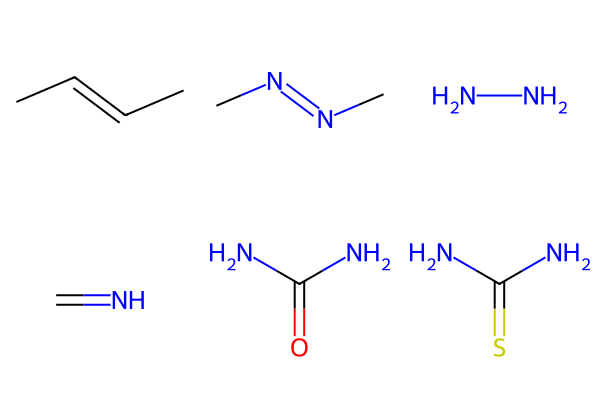

In [4]:
# Classification rules


patterns = [
    #"C=C",
    "CC=CC",
    "CN=NC",
    "NN",
    #"N=C",
    "C=N",
    #'NN',
    "NC(N)=O",
    "NC(N)=S",
]
# draw mol patterns
mol_patterns = np.array([Chem.MolFromSmiles(smi) for smi in patterns], dtype=object)
from rdkit import Chem
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_patterns, molsPerRow=3)
img

In [5]:
# Method 2 using FragmentMatchers
def initialise_matchers(patterns):
    pmatchers = [FragmentMatcher.FragmentMatcher() for p in patterns]
    for p, pm in zip(patterns, pmatchers):
        pm.Init(p)
        for p2 in patterns:
            if p2 is not p:
                #pm.AddExclusion(p2)
                continue
                #print(f"Added exclusion for {p2}")
    return pmatchers
def generate_unique_frag(mol,patterns):
    fragsmiles, fragmols, fragaps, fraparent, fraparentmol = [], [], [], [], []
    pmatchers = initialise_matchers(patterns)
    for j, pm in enumerate(pmatchers):
        if pm.HasMatch(mol):
            #print(f"{csmiles[i]} seems to contain {patterns[j]}")
            #moltype[i] = j + 1
            matches = pm.GetMatches(mol)
            bonds_to_cut = []
            for idx in matches[0]:
                for n in mol.GetAtomWithIdx(idx).GetNeighbors():
                    nidx = n.GetIdx()
                    if nidx not in matches[0]:
                        bonds_to_cut.append(mol.GetBondBetweenAtoms(idx, nidx))
            if bonds_to_cut:
                posi_ids = [b.GetBeginAtomIdx() for b in bonds_to_cut]
                pose_ids = [b.GetEndAtomIdx() for b in bonds_to_cut]
                bond_ids = [b.GetIdx() for b in bonds_to_cut]
                temp_mol_f = Chem.FragmentOnBonds(mol, bond_ids, addDummies=False)
                fmols = Chem.GetMolFrags(temp_mol_f, asMols=True)
                fatoms = Chem.GetMolFrags(temp_mol_f)
                for fmol, fatom in zip(fmols, fatoms):
                    fatom = list(fatom)
                    if not pm.HasMatch(fmol):
                        fragsmiles.append(Chem.MolToSmiles(fmol))
                        fragmols.append(fmol)
                        # print(posi_ids, pose_ids, fatom)
                        if any(a in posi_ids for a in fatom):
                            for pos in posi_ids:
                                if pos in fatom:
                                    fatom_ap_idx = list(fatom).index(pos)
                        elif any(a in pose_ids for a in fatom):
                            for pos in pose_ids:
                                if pos in fatom:
                                    fatom_ap_idx = list(fatom).index(pos)
                        fragaps.append(fatom_ap_idx)
                        #fraparent.append(names[i])
                        fraparentmol.append(mol)
    return fragsmiles, fragmols, fragaps, fraparent, fraparentmol

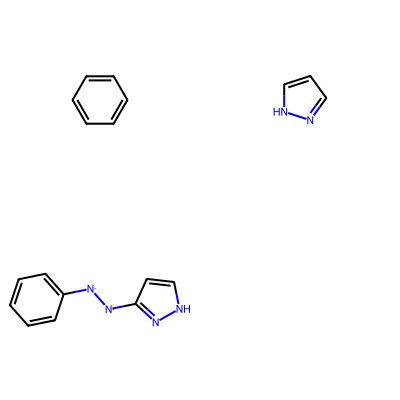

In [6]:
fragsmile, fragmol, fragap, fraparent_, fraparentmol_ = generate_unique_frag(smiles['mol'].iloc[0],patterns)
mol = smiles['mol'].iloc[0]
fragmols_plot = fragmol.copy()
fragmols_plot = np.array(fragmols_plot, dtype=object)
fragmols_plot = np.append(fragmols_plot, mol)
img = Draw.MolsToGridImage(fragmols_plot, molsPerRow=2)

img

Unique substituents detected: 194


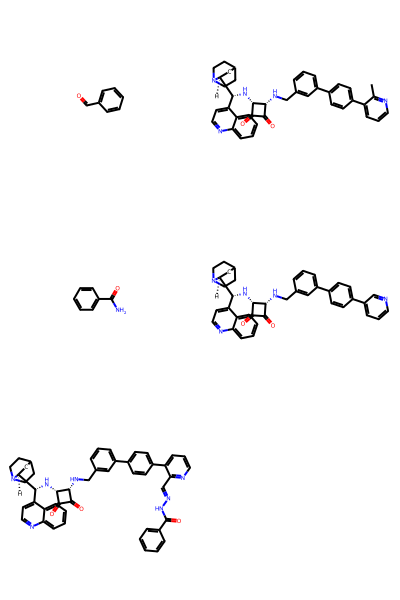

In [7]:

fragsmiles, fragmols, fragaps, fraparent, fraparentmol = [], [], [], [], []
for mol in smiles['mol']:
    fragsmile, fragmol, fragap, fraparent_, fraparentmol_ = generate_unique_frag(mol,patterns)
    fragsmiles += fragsmile
    fragmols += fragmol
    fragaps += fragap
    fraparent += fraparent_
    fraparentmol += fraparentmol_

fragsmiles, idx = np.unique(np.array(fragsmiles), return_index=True)
fragmols_plot = fragmol.copy()
fragmols_plot = np.array(fragmols_plot, dtype=object)
fragmols_plot = np.append(fragmols_plot, mol)
fragmols = np.array(fragmols, dtype=object)[idx]
fragaps = np.array(fragaps, dtype=int)[idx]
#fraparent = np.array(fraparent)[idx]
fraparentmol = np.array(fraparentmol)[idx]

print(f"Unique substituents detected: {fragsmiles.shape[0]}")
img = Draw.MolsToGridImage(fragmols_plot, molsPerRow=2)

img

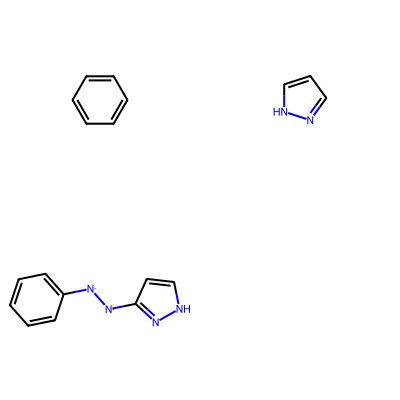

In [8]:
fragsmile, fragmol, fragap, fraparent_, fraparentmol_ = generate_unique_frag(smiles['mol'].iloc[0],patterns)
mol = smiles['mol'].iloc[0]
fragmols_plot = fragmol.copy()
fragmols_plot = np.array(fragmols_plot, dtype=object)
fragmols_plot = np.append(fragmols_plot, mol)
img = Draw.MolsToGridImage(fragmols_plot, molsPerRow=2)

img

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy
import os

# Cheminformatics stack
import rdkit
from rdkit import Chem
from rdkit.Chem import rdDistGeom
from rdkit.Chem import AllChem
from rdkit.Chem import FragmentMatcher
from rdkit.Chem import rdFMCS
from glob import glob

# For segfault
import faulthandler
import signal
from subprocess import Popen, PIPE


Unique substituents detected: 194


[12:20:24] WARNING: bond found with stereo spec but no stereo atoms
[12:20:24] WARNING: bond found with stereo spec but no stereo atoms
[12:20:24] WARNING: bond found with stereo spec but no stereo atoms
[12:20:24] WARNING: bond found with stereo spec but no stereo atoms
[12:20:24] WARNING: bond found with stereo spec but no stereo atoms
[12:20:24] WARNING: bond found with stereo spec but no stereo atoms


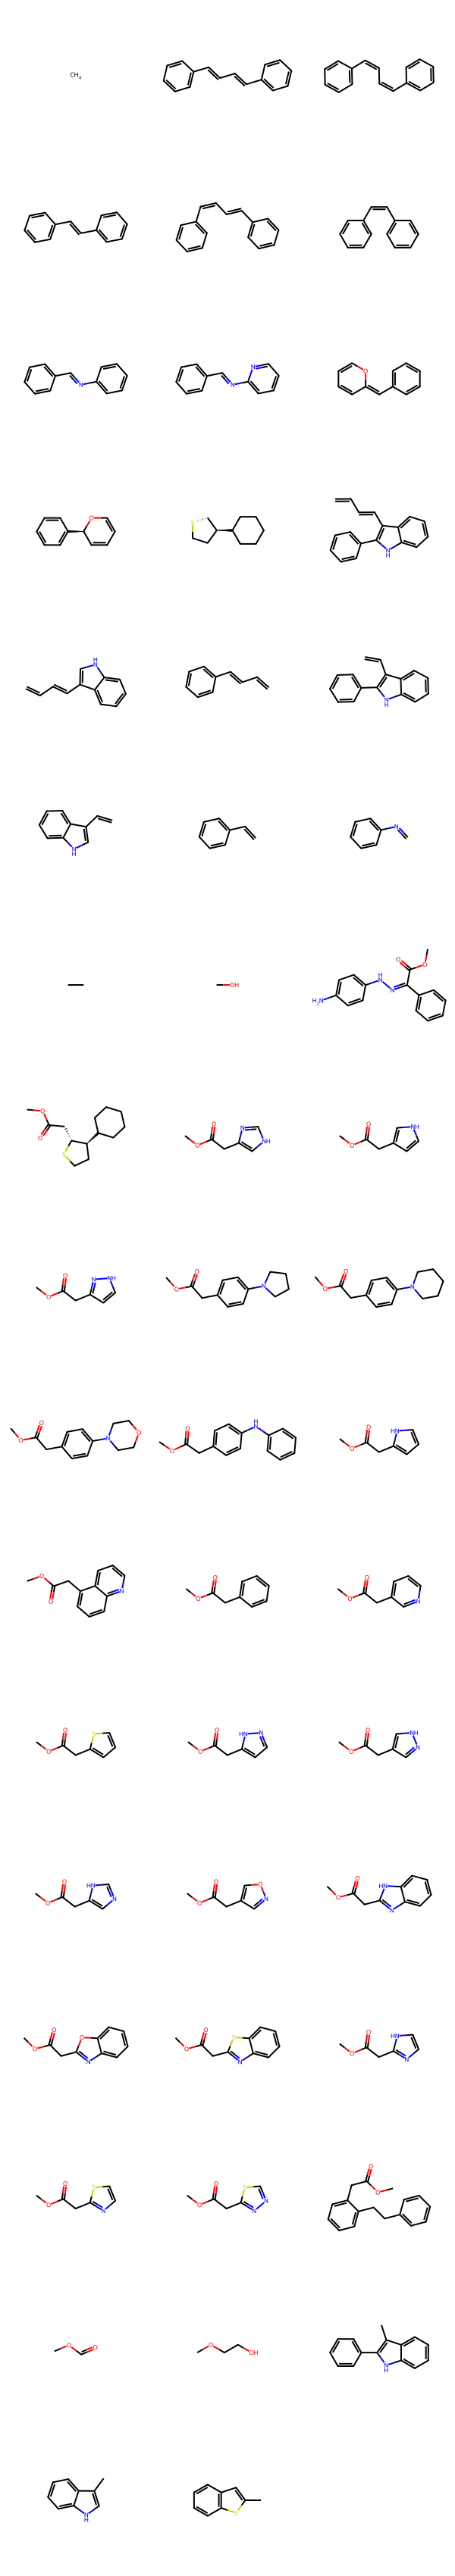

In [10]:
print(f"Unique substituents detected: {fragsmiles.shape[0]}")
img = Draw.MolsToGridImage(fragmols[:50], molsPerRow=3)
img

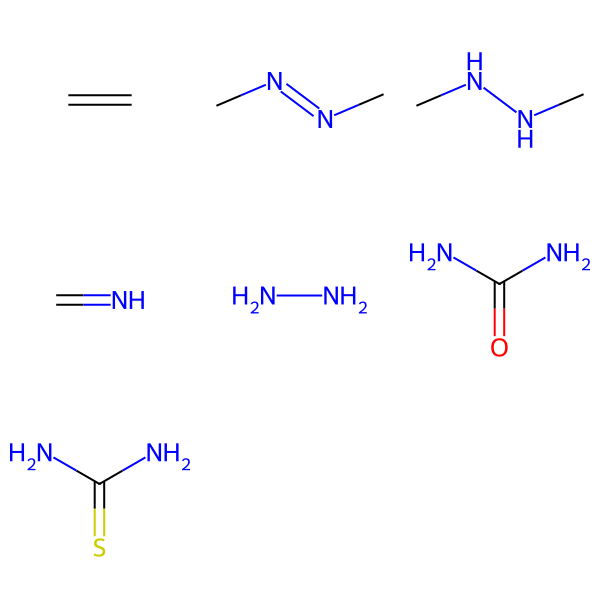

In [11]:
# Classification rules

patterns = [
    "C=C",
    "CN=NC",
    "CNNC",
    #"N=C",
    "C=N",
    'NN',
    "NC(N)=O",
    "NC(N)=S",
]
# draw mol patterns
mol_patterns = np.array([Chem.MolFromSmiles(smi) for smi in patterns], dtype=object)
from rdkit import Chem
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_patterns, molsPerRow=3)
img

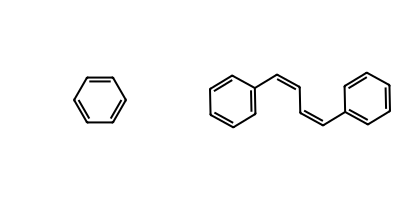

In [12]:
mol = fragmols[2]
fragsmile, fragmol, fragap, fraparent_, fraparentmol_ = generate_unique_frag(mol,patterns)
fragmols_plot = fragmol.copy()
fragmols_plot = np.array(fragmols_plot, dtype=object)
fragmols_plot = np.append(fragmols_plot, mol)
img = Draw.MolsToGridImage(fragmols_plot, molsPerRow=2)

img

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D, rdDepictor
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit.Chem import rdRascalMCES
from rdkit import rdBase
rdDepictor.SetPreferCoordGen(True)
print(rdBase.rdkitVersion)

2023.09.1


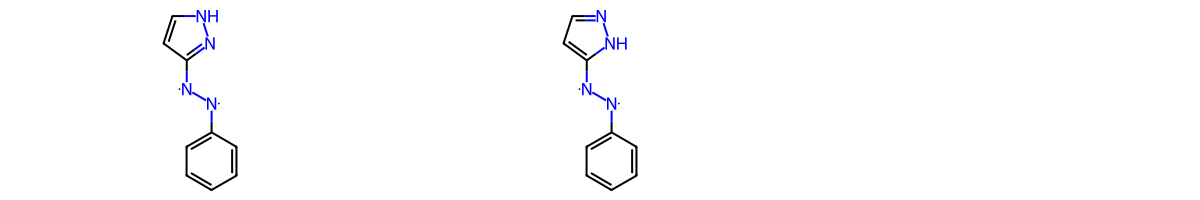

In [14]:
mol1 = smiles['mol'].iloc[0]
mol2 = smiles['mol'].iloc[2]
Draw.MolsToGridImage([mol1,mol2],subImgSize=(400,200))


In [ ]:
results = rdRascalMCES.FindMCES(mol1, mol2)
if len(results)>0:
    res = results[0]
    print(f'MCES SMARTS : {res.smartsString}')
    print(f'Matching Bonds : {res.bondMatches()}')
    print(f'Matching Atoms : {res.atomMatches()}')
else:   
    print('No MCES found')



In [ ]:
def extractHighlights(res):
    bondHighlights1 = {}
    bondHighlights2 = {}
    for bondPair in res.bondMatches():
        bondHighlights1[bondPair[0]] = (1.0, 0.0, 0.0)
        bondHighlights2[bondPair[1]] = (1.0, 0.0, 0.0)
    atomHighlights1 = {}
    atomHighlights2 = {}
    for atomPair in res.atomMatches():
        atomHighlights1[atomPair[0]] = (1.0, 0.0, 0.0)
        atomHighlights2[atomPair[1]] = (1.0, 0.0, 0.0)
    return bondHighlights1, bondHighlights2, atomHighlights1, atomHighlights2

def drawMCESMatch(mol1, bondHighlights, atomHighlights, highlightNonmatches=(0.3,0.3,1.0)):    
    d = rdMolDraw2D.MolDraw2DSVG(500, 250)
    if highlightNonmatches:
        for bnd in mol1.GetBonds():
            if bnd.GetIdx() not in bondHighlights:
                bondHighlights[bnd.GetIdx()] = highlightNonmatches
    d.DrawMolecule(mol1,highlightAtoms=atomHighlights.keys(),highlightBonds=bondHighlights.keys(),
                   highlightAtomColors=atomHighlights,highlightBondColors=bondHighlights)
    d.FinishDrawing()
    return d


bondHighlights1, bondHighlights2, atomHighlights1, atomHighlights2 = extractHighlights(res)
d = drawMCESMatch(mol1, bondHighlights1, atomHighlights1)
SVG(d.GetDrawingText())

In [ ]:
d = drawMCESMatch(mol2, bondHighlights2, atomHighlights2)
SVG(d.GetDrawingText())

In [28]:
frag_smiles_[0]

'O=C(NN=C[*:1])c1ccccc1'

In [40]:
from rdkit.Chem import rdMMPA
def fragment_mols_to_3_parts(mols_list):
    linker_list = []
    Left_block = []
    Right_block = []
    for mols in mols_list:
        frag3 = rdMMPA.FragmentMol(mols)

        for frag in frag3:
            if frag[0] is not None:
                ##display(Draw.MolsToGridImage(frag3[1]))
                linker_list.append(frag[0])
                frag_smiles_ = Chem.MolToSmiles(frag3[1][1]).split('.')
                if len(frag_smiles_) == 2:
                    if '*:1' in frag_smiles_[0]:
                        Left_block.append( Chem.MolFromSmiles(frag_smiles_[0]))
                        Right_block.append( Chem.MolFromSmiles(frag_smiles_[1]))
                    else:
                        Left_block.append( Chem.MolFromSmiles(frag_smiles_[1]))
                        Right_block.append( Chem.MolFromSmiles(frag_smiles_[0]))
    print(' number of linkers:', len(linker_list))  
    print(' number of left blocks:', len(Left_block))
    print(' number of right blocks:', len(Right_block))
    df_linkers= pd.DataFrame({'linker':linker_list, 'smiles': [Chem.MolToSmiles(m) for m in linker_list]})
    df_linkers.drop_duplicates(subset=['smiles'],inplace=True) 
    print(' number of unique linkers:', df_linkers.shape[0])
    df_linkers.head()
    df_right_block = pd.DataFrame({'right_block':Right_block, 'smiles': [Chem.MolToSmiles(m) for m in Right_block]})
    df_right_block.drop_duplicates(subset=['smiles'],inplace=True)
    print(' number of unique right blocks:', df_right_block.shape[0])
    df_left_block = pd.DataFrame({'left_block':Left_block, 'smiles': [Chem.MolToSmiles(m) for m in Left_block]})
    df_left_block.drop_duplicates(subset=['smiles'],inplace=True)
    print(' number of unique left blocks:', df_left_block.shape[0])
    return df_linkers, df_left_block, df_right_block
df_linkers, df_left_block, df_right_block = fragment_mols_to_3_parts(smiles['mol'])

 number of linkers: 2070
 number of left blocks: 2070
 number of right blocks: 2070
 number of unique linkers: 767
 number of unique right blocks: 72
 number of unique left blocks: 101


In [36]:
df_linkers= pd.DataFrame({'linker':linker_list, 'smiles': [Chem.MolToSmiles(m) for m in linker_list]})
df_linkers.drop_duplicates(subset=['smiles'],inplace=True) 
print(' number of unique linkers:', df_linkers.shape[0])
df_linkers.head()
df_right_block = pd.DataFrame({'right_block':Right_block, 'smiles': [Chem.MolToSmiles(m) for m in Right_block]})
df_right_block.drop_duplicates(subset=['smiles'],inplace=True)
print(' number of unique right blocks:', df_right_block.shape[0])
df_left_block = pd.DataFrame({'left_block':Left_block, 'smiles': [Chem.MolToSmiles(m) for m in Left_block]})
df_left_block.drop_duplicates(subset=['smiles'],inplace=True)
print(' number of unique left blocks:', df_left_block.shape[0])
df_linkers.head()


 number of unique linkers: 767
 number of unique right blocks: 72
 number of unique left blocks: 101


,linker,smiles
0,<rdkit.Chem.rdchem.Mol object at 0x0000028BFE5...,[N]([N][*:2])[*:1]
15,<rdkit.Chem.rdchem.Mol object at 0x0000028BFE5...,c1cc([*:2])ccc1[*:1]
16,<rdkit.Chem.rdchem.Mol object at 0x0000028BFE5...,c1cc([*:1])ccc1[N][N][*:2]
20,<rdkit.Chem.rdchem.Mol object at 0x0000028BFE5...,c1cc(N[*:2])ccc1[N][N][*:1]
22,<rdkit.Chem.rdchem.Mol object at 0x0000028BFE5...,c1cc([*:1])ccc1N[*:2]


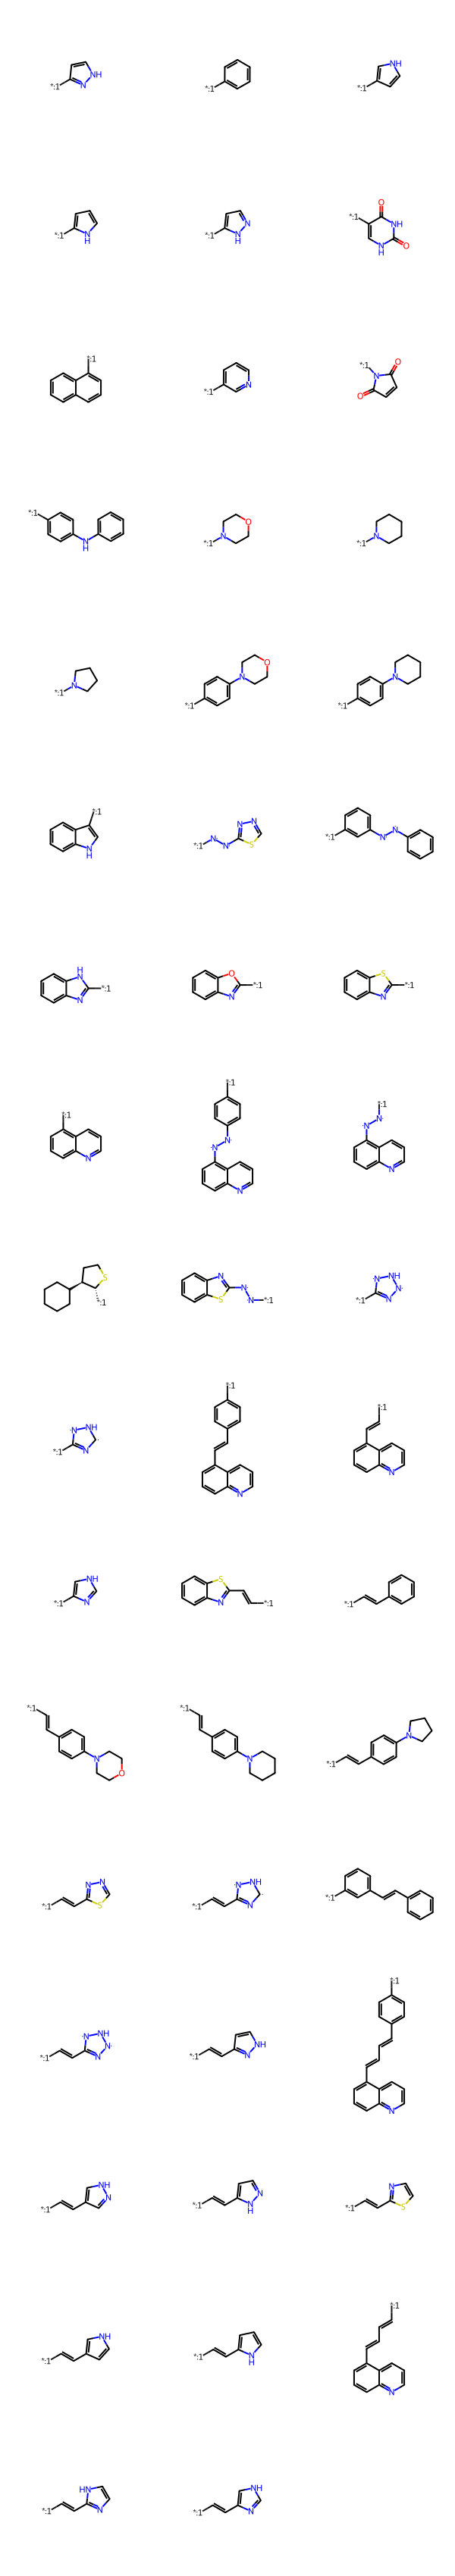

In [42]:
#display(Draw.MolsToGridImage(df_left_block['left_block'][:50]))

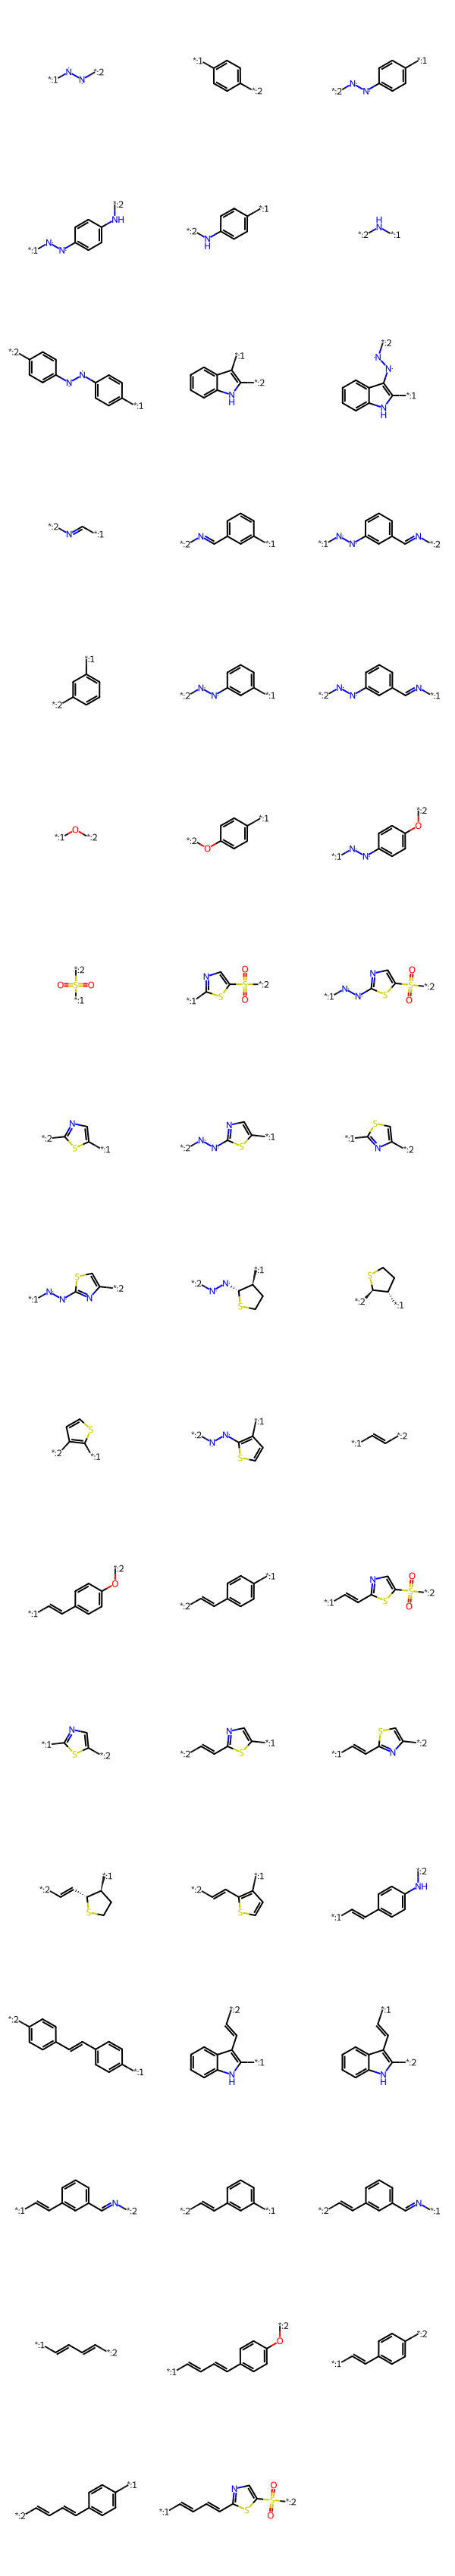

In [43]:
#display(Draw.MolsToGridImage(df_linkers['linker'][:50]))